# Problem Set 2, due January 23th at 5:30 pm/January 24th 3:30pm

**Please Note:** This assignment will likely take you a _long_ time, especially if you are new to Python. Start early!

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import library for stats 
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

In [86]:
#import progressa sample data
progressa_df = pd.read_csv('progresa_sample.csv')

In [87]:
#analyze progressa data structure
print progressa_df.shape
print progressa_df.columns
print progressa_df.dtypes

(77250, 21)
Index([u'year', u'sex', u'indig', u'dist_sec', u'sc', u'grc', u'fam_n',
       u'min_dist', u'dist_cap', u'poor', u'progresa', u'hohedu', u'hohwag',
       u'welfare_index', u'hohsex', u'hohage', u'age', u'village', u'folnum',
       u'grc97', u'sc97'],
      dtype='object')
year               int64
sex              float64
indig            float64
dist_sec         float64
sc               float64
grc              float64
fam_n              int64
min_dist         float64
dist_cap         float64
poor              object
progresa          object
hohedu             int64
hohwag           float64
welfare_index    float64
hohsex           float64
hohage           float64
age                int64
village            int64
folnum             int64
grc97              int64
sc97             float64
dtype: object


In [88]:
#analyze progressa data
progressa_df.head() #get the top 6 records


,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


---

##Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [89]:
#create a list to store the columns and order the list
demo_list =[] 
for column in progressa_df.columns:
    if column == 'year' or column == 'folnum' or column == 'village' or  column=='poor' or column=='progresa':
        continue
    else:
        demo_list.append(column)
demo_list.sort()
 

In [90]:
#create a class to build the table 
class ListTable(list):
    # renders an HTML Table to show mean and standard deviation for each of the variables.
    def _repr_html_(self):
        html = ["<table width=40%>"]
        html.append("<tr><th>Demographic</th><th>Mean</th><th>Standard Deviation</th></tr>")
        for l in self:
            html.append("<tr>")
            html.append("<td>{0}</td>".format(l))
            html.append("<td>{0}</td>".format(progressa_df[l].mean()))
            html.append("<td>{0}</td>".format(progressa_df[l].std()))
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

#call the class with the demographic data - this will execute the html generator function     
ListTable(demo_list)

Demographic,Mean,Standard Deviation
age,11.3664595469,3.16774384259
dist_cap,147.674452051,76.06313355
dist_sec,2.41890995954,2.23410880784
fam_n,7.21571521036,2.35290045582
grc,3.96353658364,2.4990634662
grc97,3.70537216828,2.57238732312
hohage,44.4367167271,11.6203715968
hohedu,2.76810355987,2.65610577554
hohsex,0.92518451379,0.263095088332
hohwag,586.985312361,788.133664195


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male  |?     |?     |?     |?     |


In [91]:
#filter for year = 97, treatment villages and individuals that are poor
treatment = progressa_df.query('year == 97').query('progresa =="basal"').query('poor =="pobre"').dropna()

#filter for year = 97, controlled villages and individuals that are poor
controlled = progressa_df.query('year == 97').query('progresa !="basal"').query('poor =="pobre"').dropna()
        

In [92]:
#Create a class to build the table
class ListTable():
    # renders an HTML Table to show mean and standard deviation for each of the variables.
    def _repr_html_(self):
        html = ["<table>"]
        html.append("<tr><th>Variable name</th><th>Average value(Treatment villages)</th><th>Average value (Control villages)</th><th>Difference(Treat - Control)</th><th>p-value</th></tr>")
        for l in demo_list:
            #calculate the t-test and the p-value
            t, p = ttest_ind(treatment[l], controlled[l], equal_var = False)
            html.append("<tr>")
            html.append("<td>{0}</td>".format(l))
            html.append("<td>{0}</td>".format(treatment[l].mean()))
            html.append("<td>{0}</td>".format(controlled[l].mean()))
            html.append("<td>{0}</td>".format(treatment[l].mean() - controlled[l].mean()))
            html.append("<td>{0}</td>".format(p))
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

#calling the class - this will output the table with the related data     
ListTable()

Variable name,Average value(Treatment villages),Average value (Control villages),Difference(Treat - Control),p-value
age,10.7438250564,10.78558574,-0.0417606836206,0.247407683584
dist_cap,151.801472408,154.492094615,-2.6906222073,0.00436191360837
dist_sec,2.3996477634,2.40068668559,-0.00103892219251,0.968070298907
fam_n,7.28103204153,7.30293941212,-0.0219073705842,0.426054245783
grc,3.70921390739,3.73365326935,-0.0244393619572,0.395506627957
grc97,3.70921390739,3.73365326935,-0.0244393619572,0.395506627957
hohage,43.6312339399,44.2707172851,-0.639483345212,2.38741915656e-06
hohedu,2.72672924642,2.6609820893,0.0657471571245,0.0249552747126
hohsex,0.925586029682,0.923386751221,0.0021992784605,0.47954208484
hohwag,550.207085704,580.694451902,-30.4873661979,0.000285131460141


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

Are there statistically significant differences between treatment and control villages as baseline?

The calculated p-values for welfare_index, sex, hohwag, hohedu, and dist_cap have a p-value less than 0.05. Thus, they provide a strong evidence against the null hypothesis, so we reject the null hypothesis and conclude that mean for treatment is different than the mean for the controlled group. If we analyze hohedu or "years of schooling of head of household" we could conclude that the mean is statistically significant after treatment than it is after controlled. 

Similarly, the following variables, age, fam_n, dist_sec, grc, hohage, hohsex, indig, min_dist, and sc have a p-value much greather than 0.05. Thus, they provide a weak evidence agianst the null hypothesis, so we fail to reject the null hypothesis. Thus,  for these variables the mean is not statiscally significant after treatment than it is after controlled. 

Why does it matter if there are differences at baseline?

Differences between groups in baseline variables matter because of the possible impact they may have on the outcome. Take for instance, variables like sc, age, sex, hohegu that could have some impact rather it's by chance or due to treatment. Ideally, we want to avoid any type of results based of chance. 

What does this imply about how to measure the impact of the treatment?

We should not rely solely on the p-value. The p-value tells us if there is an effect among the subjects in the treatment or the controled groups, but it cannot tell us how much the effect is. In order to get more insights on the legimity and the effect of the measurement, we will need another evaluation factor that amplifies the impact of the treatment. 

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

In [93]:
#create a dictionary to hold the education level and the average enrollment
edu_dict ={}
#filter for participants in 97
grouped = progressa_df.query('year == 97').dropna() 
#grouped by household education level and get the mean
grouped = grouped.groupby('hohedu').mean()
# add enrollment average value into a dictionary based on the household education
for index, row in grouped.iterrows():
    edu_dict[index] = round(row['sc'],2)


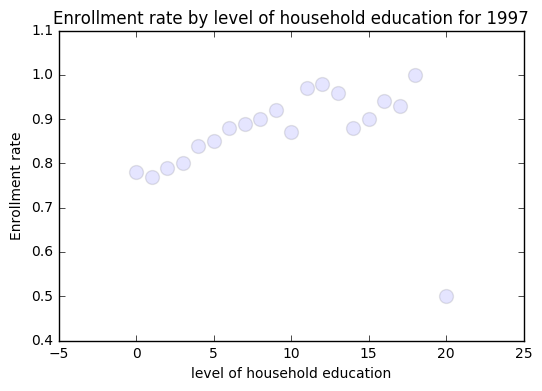

In [94]:
#Set the x and y coordinates based on the value added in the dictionary
x, y = edu_dict.keys(), edu_dict.values()
plt.scatter(x, y, alpha=.1, s=100) #plot the cooridnates
# Add a title.
plt.title("Enrollment rate by level of household education for 1997")
# Add labels to both the Y and X axis
plt.ylabel('Enrollment rate')
plt.xlabel('level of household education')
plt.show() #show the  scatter plot


The scatteplot shows a moderate positive correlation. Thus, enrollment rate tends to increase as level household 
education increases. However, we also noticed a single outlier that falls outside the overall pattern of the 
scatter plot. At education level 20, the enrollment rate suddenly experienced a major drop.  

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households).
* Does there appear to be a difference? Is this difference statistically significant?
* Which D estimator in Schultz (2004) does this approach correspond to?

In [95]:
#create a dictionary to hold enrollment rate
village98_enrolled = {}
#filter for year = 98, treatment villages and individuals that are poor
treatment98 = progressa_df.query('year == 98').query('progresa =="basal"').query('poor =="pobre"').dropna()
#grouped the filtered results by villages and created the mean
grouped = treatment98.groupby('village').mean()
#add the mean enrollment based on the village into the dictionary
for index, row in grouped.iterrows():
    village98_enrolled[index] = round(row['sc'],2)
    

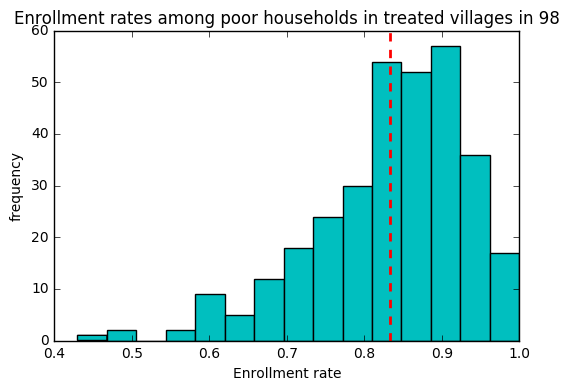

In [96]:
#calculate the mean value for the vertical line
meanOfValues = float(sum(village98_enrolled.values())) / len(village98_enrolled)
#selecting the x coordinates as the values of the dictionary
x=village98_enrolled.values()
#plot the vertical line
plt.axvline(meanOfValues, color='r', linestyle='dashed', linewidth=2)
plt.title('Enrollment rates among poor households in treated villages in 98')
plt.ylabel('frequency')
plt.xlabel('Enrollment rate')
plt.hist(x, bins='auto', color='c') #plot the histogratm
plt.show() #show the graph


In [97]:
#create a dictionary to hold enrollment rate
village97_enrolled = {}
#filter for year = 97, treatment villages and individuals that are poor
treatment97 = progressa_df.query('year == 97').query('progresa =="basal"').query('poor =="pobre"').dropna()
#grouped the filtered results by villages and created the mean
grouped = treatment97.groupby('village').mean()
#add the mean enrollment based on the village into the dictionary
for index, row in grouped.iterrows():
    village97_enrolled[index] = round(row['sc'],2)


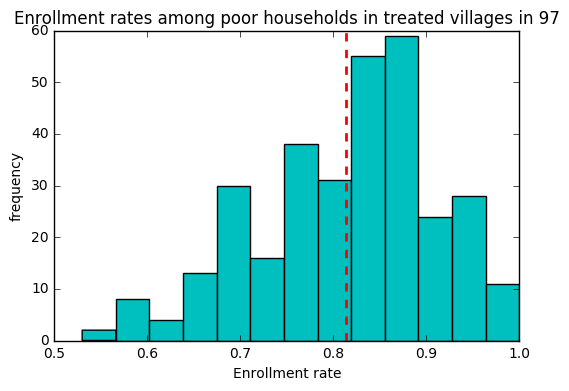

In [98]:
#calculate the mean value for the vertical line
meanOfValues = float(sum(village97_enrolled.values())) / len(village97_enrolled)
#selecting the x coordinates as the values of the dictionary
x=village97_enrolled.values()
#plot the vertical line
plt.axvline(meanOfValues, color='r', linestyle='dashed', linewidth=2)
plt.title('Enrollment rates among poor households in treated villages in 97')
plt.ylabel('frequency')
plt.xlabel('Enrollment rate')
plt.hist(x, bins='auto', color='c') #plot the histogram
plt.show() #show the graph

Does there appear to be a difference? Is this difference statistically significant?

The vertical lines between the two graphs show some sort of differences though not significant. The null hypothesis is that there is no difference in enrollment rates among poor households in treated villages in 97 and 98. Since no P-values are given to find some sort of statisfical significant, then the next thing is to look at the histogram representation. knowing that a histogram is an approximation of a frequency of a probability density function, then the two histograms show different distribution of enrollments for similar frequencies. Thus, there is a significance at least in the way the frequencies are distributed. 


Which D estimator in Schultz (2004) does this approach correspond to?

It seems to represent the "Kernel density estimators"

## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment).
* calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages.
* Which difference estimator in Schultz (2004) does this approach correspond to?
* Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [99]:
#filter poor households from the treatment group in 98
treatmentPoor = progressa_df.query('year == 98').query('progresa =="basal"').query('poor =="pobre"').dropna()
#calculate the average enrollment for treated group
print treatmentPoor.sc.mean() 

#filter poor households from the controlled group in 98
controlledPoor = progressa_df.query('year == 98').query('progresa == "0"').query('poor =="pobre"').dropna()
#calculate the average enrollment for controlled group
print controlledPoor.sc.mean()

0.849257030578
0.810923092512


Which difference estimator in Schultz (2004) does this approach correspond to?

This approach corresponds to difference-to-difference estimator

In [100]:
#calculate t-test for treatment and contolled groups 
t, p = ttest_ind(treatmentPoor.sc, controlledPoor.sc)
print t, p

8.1016503053 5.65645560536e-16


This t-est generates a p-value that's vastly less than 0.05, thus we reject the null hypothesis that 
there is no difference between the treated group and the controlled group. 


### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [101]:
#filter poor households group in 98
grouped3= progressa_df.query('year == 98').query('poor =="pobre"').dropna()
#generating a linear regression of enrollment on the treatment
#convert treatment from basal to 1 before generating a linear regression
grouped3.loc[grouped3['progresa'] == 'basal'] = 1
mod = smf.ols(formula='sc ~ progresa', data=grouped3)
res = mod.fit()
print res.summary() #show the regression summary      


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     3797.
Date:                Fri, 27 Jan 2017   Prob (F-statistic):               0.00
Time:                        17:21:51   Log-Likelihood:                 156.25
No. Observations:               26155   AIC:                            -308.5
Df Residuals:                   26153   BIC:                            -292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.0000      0.002    530.545

In [102]:
#added another version without converting basal to 1
#filter poor households group in 98
grouped3= progressa_df.query('year == 98').query('poor =="pobre"').dropna()
#generating a linear regression of enrollment on the treatment
mod = smf.ols(formula='sc ~ progresa', data=grouped3)
res = mod.fit()
print res.summary() #show the regression summary      


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     65.64
Date:                Fri, 27 Jan 2017   Prob (F-statistic):           5.66e-16
Time:                        17:21:51   Log-Likelihood:                -11171.
No. Observations:               26155   AIC:                         2.235e+04
Df Residuals:                   26153   BIC:                         2.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8109      0.00

Based on this model, how much did Progresa increase the likelihood of a child enrolling?

In this linear regression, progresa is our predictor, and "sc" being the target/response variable. The intercept 
in this regression is essentialy the enrollment rate expected to see an impact caused by progresa. The coefficient estimate shows that progresa tends to go down by 0.18 for every increase in enrollment for the controlled group. Also, I added a second regression that shows that enrollment rate increased for the treatment group by 0.0383.

Thus, progresa did impacting a child likelihood of enrolling either from the controlled or the treated group. 


How does your regression estimate compare to your t-test estimate from part 2.1?

In 2.1 we concluded that with a p-value less than 0.05 we were able to reject the null hypothesis. With this regression estimate we notice that the soefficient t-value is vastly away from zero. Thus, we can also conclude that we can also reject the null hypothesis. Thus, both the regression estimate and the t-test match when it comes to rejecting the null hypothesis. that is, we could declare that a relationship between enrollment and progresa do exist. 

Based on this regression model, can we reject the null hypothesis that the treatment effects are zero?

We can confirm that a relationship exists between enrollement and treatment. The coefficient estimate shows that progresa tends to go down by 0.18 for every increase in enrollment for controlled group, but we also show an increase in enrollment for the treated group. We would need to perform additional analysis to confirm whether there are no effects. So we can reject the null hypothesis and confirm that the treatment has had an impact on enrollments. 

What is the counterfactual assumption underlying this regression?

This regression may not provide clear assumption. We do know after the treatment, the enrollment frequency rate can be calculated, but the control is not clear. We may have to analyze how each level education are impacted. Is it the location, age, gender, distance from schools etc. Different control conditions imply different counterfactual states and thus induce different causal effects. 

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [103]:
#filter poor households group in 98
grouped4 = progressa_df.query('year == 98').query('poor =="pobre"').dropna()
#convert treatment from basal to 1 before generating a linear regression
grouped4.loc[grouped4['progresa'] == 'basal'] = 1
#generating the miulitple linear regression
mod = smf.ols(formula='sc ~ progresa + sex + indig+ dist_sec + grc + fam_n + min_dist + dist_cap+ hohedu + hohwag + welfare_index + hohsex + hohage + age', data=grouped4)
res = mod.fit()
print res.summary() #generate a summary regression 


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     1271.
Date:                Fri, 27 Jan 2017   Prob (F-statistic):               0.00
Time:                        17:21:52   Log-Likelihood:                 5174.0
No. Observations:               26155   AIC:                        -1.032e+04
Df Residuals:                   26140   BIC:                        -1.020e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.9822      0.010     96.066

In [104]:
#redo the same but without changing basal to 1
#filter poor households group in 98
grouped4 = progressa_df.query('year == 98').query('poor =="pobre"').dropna()
#generating the miulitple linear regression
mod = smf.ols(formula='sc ~ progresa + sex + indig+ dist_sec + grc + fam_n + min_dist + dist_cap+ hohedu + hohwag + welfare_index + hohsex + hohage + age', data=grouped4)
res = mod.fit()
print res.summary() #generate a summary regression 


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     789.3
Date:                Fri, 27 Jan 2017   Prob (F-statistic):               0.00
Time:                        17:21:52   Log-Likelihood:                -6593.5
No. Observations:               26155   AIC:                         1.322e+04
Df Residuals:                   26140   BIC:                         1.334e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             1.6518      0.02

How do the controls affect the point estimate of treatment effect?

The coefficient estimate contains fifteens rows or fifteen contols.Each will have an impact on the treatment. As we add or remove control variables the point estimate of the treatment is affected. The intercept, in this linear regression, is essentially the expected value of the enrollement required to experience any form of impact on the treatment when considering multiple variables such as age, distance, gender etc. In this case, it takes on average 0.9822 for a school enrollment that has a treatment that's effective. 

How do the controls affect the standard error on the treatment effect?

Ideally, the standard error gives an estimate of the expected difference in case we ran the model again and again. 
In other words, we can say that the required treatment to affect an enrollment vary by  a std error of 0.019. 
Also, the standard error can be used to compute confidence intervals and to statistically test the hypothesis 
of the existence of a relationship between enrollment (increase or decrease) and a given treatment.


How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In 2.2 which was a single linear regression, our estimate shows that progresa(treatment) tends to go down by 0.18 for every increase in enrollment. While in 2.3 or the multi linear regression, our estimate shows that progresa(treatment) tends to increase by  0.7157 for every increase in enrollment. Thus, we can conclude that the addition of additional control variables like sex, dist_sec, etc in the multi regression have made a significant impact into improving the possibility of enrollment. 

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [105]:
# calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated village
enrolledTreatmentPoor = progressa_df.query('progresa =="basal"').query('poor =="pobre"').dropna()
grouped5 =  enrolledTreatmentPoor.query('year >= 97 and year <= 98')
grouped5.sc.mean()

# calculate the difference (between 1997 and 1998) in enrollment rates among poor households in controlled village
controlledPoor = progressa_df.query('progresa == "0"').query('poor =="pobre"').dropna()
grouped6 = controlledPoor.query('year >= 97 and year <= 98')
grouped6.sc.mean()

# compute the estimate difference in difference between controlled and treated group
estimate = grouped5.sc.mean() - grouped6.sc.mean()
estimate


0.021763984968193095

What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?

In 2.4, we split a population of potential people that might enrolled in school in two groups. One, is the control group that has not been affected by progresa. The other was affected by progresa: they are the treatment group. Essentially, the Difference-in-Difference will capture the fact that the real effect of the progresa is not directly measurable in terms of how many people who were impacted by progresa ended up enrolling in school. Ideally, we want to know if these people did better than the ones who were not impacted by progresa. 

In simple difference, we only have the treatment group and noticed that progresa (treatment) tends to go down by 0.18 for every increase in enrollment. In the difference-in-difference between the conroled and treated group, we notice that enrollment rose in treatment group relative to the controlled group. 

What is the counterfactual assumption underlying this estimate?

We don’t know the outcome of the treatment group when they weren’t treated. In other words, we don't know how enrollment would have been impacted when treated group was not under the impact of progresa. But we do know that the difference in estimation between treated and controled group was around 0.0217. We assume that this difference is fixed over time. If we were to repeat the same experiment in 1999, we hope to have a similar difference between the treated and controlled group. 


### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [106]:
import statsmodels.formula.api as smf
grouped7 = progressa_df.query('poor =="pobre"').dropna()
#convert treatment from basal to 1 before generating a linear regression
grouped7.loc[grouped7['progresa'] == 'basal', 'progresa'] = 1
#convert year from 98 to 1 and 97 to 0
grouped7.loc[grouped7['year'] == 98, 'year'] = 1
grouped7.loc[grouped7['year'] == 97, 'year'] = 0
#generate a linear regression 
mod = smf.ols(formula='sc ~ year*progresa + sex + indig+ dist_sec + grc + fam_n + min_dist + dist_cap+ hohedu + hohwag + welfare_index + hohsex + hohage + age ', data=grouped7)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     1582.
Date:                Fri, 27 Jan 2017   Prob (F-statistic):               0.00
Time:                        17:21:53   Log-Likelihood:                -14983.
No. Observations:               56893   AIC:                         3.000e+04
Df Residuals:                   56876   BIC:                         3.015e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              1.6165      0

In [107]:
#redo the same as above without the conversion for basal and year
import statsmodels.formula.api as smf
grouped7 = progressa_df.query('poor =="pobre"').dropna()
#generate a linear regression 
mod = smf.ols(formula='sc ~ year*progresa + sex + indig+ dist_sec + grc + fam_n + min_dist + dist_cap+ hohedu + hohwag + welfare_index + hohsex + hohage + age ', data=grouped7)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     1582.
Date:                Fri, 27 Jan 2017   Prob (F-statistic):               0.00
Time:                        17:21:53   Log-Likelihood:                -14983.
No. Observations:               56893   AIC:                         3.000e+04
Df Residuals:                   56876   BIC:                         3.015e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -1

What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.

The intercept, in this linear regression, is essentially the expected value of the enrollement required to experience any form of impact on the treatment when considering multiple variables such as age, distance, gender etc. In this case, enrollment rate of youth to attend school appears to increase by 1.6165. 

The standard error can be used to compute an estimate of the expected difference in case we ran the model again and again. In other words, we can say that the required length of time to identify impact on enrollment can vary by 0.003 years. 

How do these estimates of the treatment effect compare to the estimates based on the simple difference?

In simple difference, we only have the treatment group and noticed that progresa (treatment) tends to go down by 0.18 for every increase in enrollment. In 2.5, we generated a linear regression based on the difference-in-difference. We generated a cross-sectional regression between year and progresa as such, treatControl = year * treatment. The cross-sectional came at -0.0289 or 0.0289 when not converting the variables to either 0 0r 1.Thus, in both we a decrease in enrollment that could be an effect of the control group. Or an increased in enrollment for the treated group. 


How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?

In 2.5, we generated a linear regression based on the difference-in-difference. We generated a cross-sectional regression between year and progresa as such, treatControl = year * treatment. Ideally, the coefficient estimated for the cross-sectional values should be close to the manual DID calculation. The cross-sectional came at 0.0289. And the manual DiD came to be at: 0.021763984968193095 or -0.021763984968193095 depending if the difference is done from treatement minus controlled or vice-versa. In any case, the estimate done in 2.4 and in 2.5 are not that far off. 

The differences can be related to variables that were not accounted for and or were missing in the assessment. 


What is the counterfactual assumption underlying this regression?

We don’t know the outcome of the treatment group for the time where they were not under the supervision of any type of treatment. In other words, we don't know how enrollment would have been impacted when treated group was not under the impact of progresa. But we do know based on the cross-sectional regression that for every increase in enrollment, year * treatment tends to decrease in the controlled group. We assume that this trend is fixed over time. If we were to repeat the same experiment in 2001, we hope to have a similar trends in the increase of enrollment. 

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [108]:
# calculate the difference  in enrollment rates among poor households in treated village in 1998
enrolledTreatmentPoor98 = progressa_df.query('progresa =="basal"').query('year == 98').dropna()
#poor treatment group
grouped8 =  enrolledTreatmentPoor98.query('poor =="pobre"')
#non-poor treatment group 
grouped9 =  enrolledTreatmentPoor98.query('poor =="no pobre"')

# calculate the difference  in enrollment rates among poor households in controlled village in 1998
controlledPoor98 = progressa_df.query('progresa == "0"').query('year == 98').dropna()
#poor treatment group 
grouped10 = controlledPoor98.query('poor =="pobre"')
#non-poor treatment group 
grouped11 =  controlledPoor98.query('poor =="no pobre"')

# compute the estimate of the average treatment effects of the program for poor and non-poor households
estimate = (grouped8.sc.mean() - grouped9.sc.mean()) - (grouped10.sc.mean() - grouped11.sc.mean())
print estimate


0.00888518210822


How would we estimate this version of the treatment effects in a regression model?

As seen previously, the coefficient estimated for the cross-sectional values was close to the manual DiD calculation. Thus, we expect in the case of a cross-sectional regression, the coefficient estimation should be close to 0.008885182108223755. 

What is the counterfactual assumption underlying this regression?

We don’t know the outcome of the treatment group for the time where they were not under the supervision of any type of treatment. In other words, we don't know how enrollment would have been impacted when treated group was not under the impact of progresa. But we do know based on the DiD of the controlled grouped against the treated group for poor and non-poor tthat there is an increase of 0.008885182108223755 in enrollment. We assume that this trend is fixed over time, so if we were to repeat the same experiment in 2001, we hope to have a similar trends in the increase of enrollment.

How do these treatment effects compare to the estimates above?

When non poor households are added into either the controlled or treated group, we see an increase in the individual treatment or controlled group. However, the overall Difference-in-Difference between the two groups show a huge drop in the enrollment rate. It is important to note that there is still a positive trends in the enrollment, but it is just a lower increase trend when compare to the case where we did not have the non-poor households.  


Discuss some possible explanations for differences or similarities

Possible scenarios can be the reason of this difference, and one possible scenario could be related to the possibility of misclassification between poor and non-poor households. It is quite possible that hanges in the classification may have caused bias to be added into how the data was collected. We don't know if classification may have taken place before or after the treatments and or some households have moved from poor to non-poor and vice-versa. 


### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?
* C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.

No-Time to work on this. 

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you thik that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

Yes, my observation is that progresa has an impact into enrollment rates of poor households. Most of the analysis done showed an increase in enrollment rate for mainly poor households. There is substantial evidence to support the claim that this program has had a positive impact in improving school's enrollment among youth in Mexico. 

One concern though there is a drop in enrollment for higher level of education. It could be that most people have had the basic level of education and were able to find jobs, thus they were not as concerned as enrolling to further education. This is understable as the participants come from poor rural areas. 